# Intrusion Detection System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [3]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D
from keras.initializers import random_uniform
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.layers import SimpleRNN
#from hyperas.distributions import uniform

from keras.utils.np_utils import to_categorical
from keras import regularizers
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
train=pd.read_csv('NSL_Dataset/Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset/Test.txt',sep=',')

In [5]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [7]:
len(columns)

43

In [8]:
train.columns=columns
test.columns=columns

In [9]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [13]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [14]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [15]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [16]:
train.shape

(125972, 44)

### Basic Exploratory Analysis

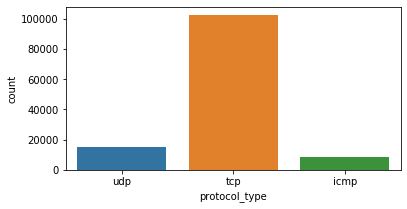

In [17]:
%matplotlib inline
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

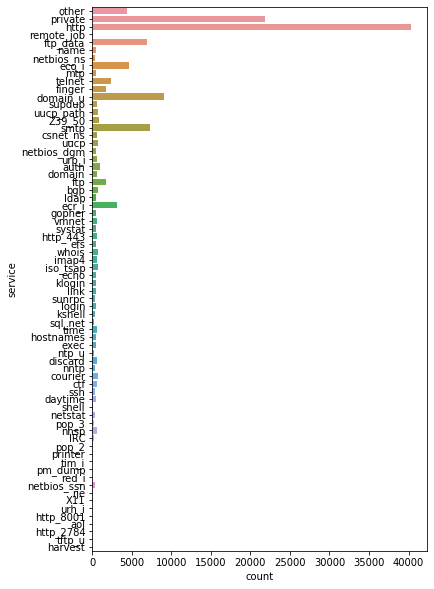

In [18]:
# service distribution
%matplotlib inline
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

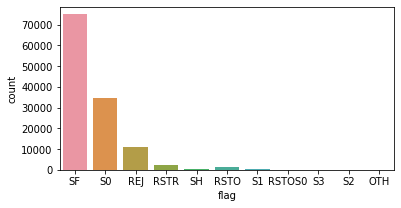

In [21]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

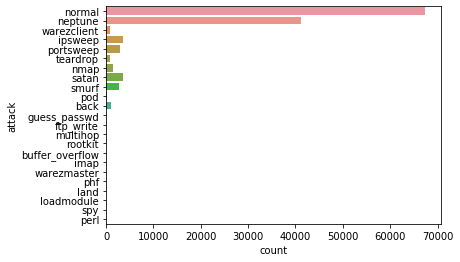

In [22]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

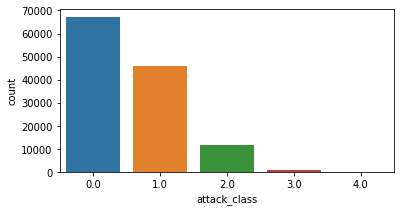

In [23]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

In [24]:
train.groupby('attack_class').mean().T

attack_class,0.0,1.0,2.0,3.0,4.0
duration,168.589899,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.467064,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.749517,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230658,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710656,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507083,0.019226,0.000601,0.077387,1.211538


In [19]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [20]:
numeric_var_names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [21]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [22]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1.0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0.0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0


In [23]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


In [24]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [25]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.000198,0.00,1.408613e-02,1.984190e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.022688,0.00,2.535310e-01,6.427796e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.000111,0.00,1.436608e-02,2.063844e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.001222,0.00,4.523932e-02,2.046596e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.395739,0.00,4.890107e-01,2.391315e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [26]:
num_summary.to_csv('num_summary.csv')

### Handling Outlier

In [27]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

In [28]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(cat_summary)

In [29]:
cat_summary

,protocol_type,service,flag,attack
N,125972,125972,125972,125972
NMISS,0,0,0,0
ColumnsNames,tcp 102688 udp 14993 icmp 8291 N...,http 40338 private 21853 domain_u...,SF 74944 S0 34851 REJ 1123...,normal 67342 neptune 41...


In [30]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [31]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0.0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064538,0.062081,...,-0.000757,-0.005534,0.408874,-0.000414,-0.023837,-0.020279,0.000605,-0.011691,0.037013,-0.001571
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,-0.000898,0.002845,-0.022114,-0.001067,-0.028784,-0.002928,-0.000555,-0.013779,0.047995,-0.002012
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.421999,0.237363,...,0.010050,-0.014104,-0.053377,0.006873,-0.060374,-0.051676,-0.000156,-0.029791,-0.011541,0.064962
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.020279,-0.002928,-0.051676,NaN,NaN,NaN,-0.020616,NaN,-0.118539,-0.014876,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000605,-0.000555,-0.000156,NaN,NaN,NaN,-0.000561,NaN,0.000850,-0.000405,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.011691,-0.013779,-0.029791,NaN,NaN,NaN,-0.011886,NaN,-0.068341,-0.008576,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.037013,0.047995,-0.011541,NaN,NaN,NaN,0.270177,NaN,0.104233,-0.008567,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


In [34]:
corrm.to_csv('corrm.csv')

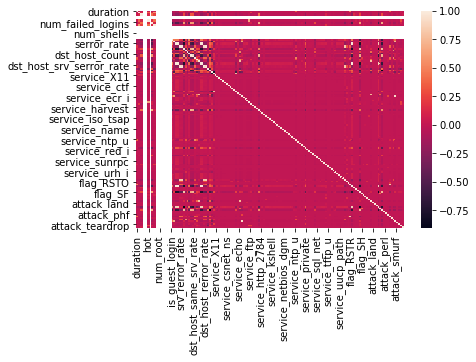

In [35]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

#### Dropping columns

In [36]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

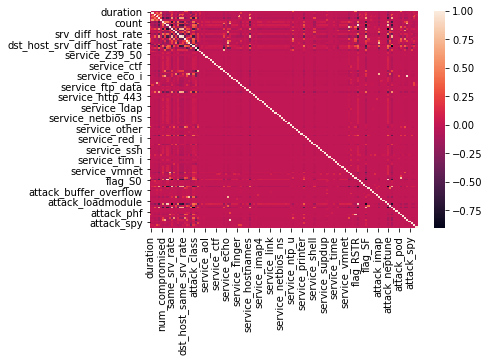

In [37]:
sns.heatmap(train_new.corr())

In [39]:
train=train_new
test=test_new

## Model Building

In [40]:
top_features=['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','serror_rate','service_http']
X_train = train[top_features]
y_train = train['attack_class']
X_test = test[top_features]
y_test = test['attack_class']

### Logistic Regression

In [41]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

In [42]:
y_pred=lr_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [43]:
from sklearn.metrics import accuracy_score
lr = accuracy_score(y_test, y_pred)
lr

0.8376879740939538

In [44]:
import pickle
# Saving model to disk of random forest
pickle.dump(lr_clf, open('model.pkl','wb'))

### Decision Trees

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [46]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=8 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=8, max_features=8)

#### Feature Relative Importance

In [47]:
clf_tree.feature_importances_

array([9.93841887e-02, 2.91875253e-01, 4.07516677e-03, 2.25893074e-02,
       2.69063334e-03, 7.58091608e-03, 1.54571184e-02, 1.66245797e-03,
       1.61237617e-04, 0.00000000e+00, 1.86013819e-02, 0.00000000e+00,
       5.16422688e-01, 7.87920686e-04, 1.87117302e-02])

In [48]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('attack_neptune', 0.09938418872224238),
 ('attack_normal', 0.2918752528154734),
 ('attack_satan', 0.004075166772940149),
 ('count', 0.022589307432504056),
 ('dst_host_diff_srv_rate', 0.0026906333435886714),
 ('dst_host_same_src_port_rate', 0.007580916084220016),
 ('dst_host_same_srv_rate', 0.015457118408184974),
 ('dst_host_srv_count', 0.0016624579675156574),
 ('flag_S0', 0.0001612376165890242),
 ('flag_SF', 0.0),
 ('last_flag', 0.018601381908611707),
 ('logged_in', 0.0),
 ('same_srv_rate', 0.5164226880631627),
 ('serror_rate', 0.0007879206863025443),
 ('service_http', 0.018711730178664784)]

In [49]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
12,same_srv_rate,0.516423
1,attack_normal,0.291875
0,attack_neptune,0.099384
3,count,0.022589
14,service_http,0.018712
10,last_flag,0.018601
6,dst_host_same_srv_rate,0.015457
5,dst_host_same_src_port_rate,0.007581
2,attack_satan,0.004075
4,dst_host_diff_srv_rate,0.002691


In [50]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [51]:
tree_test_pred.sample( n = 10 )

,actual,predicted
15514,0.0,0.0
628,1.0,1.0
8076,1.0,1.0
15647,2.0,1.0
7340,1.0,1.0
19301,0.0,0.0
19670,1.0,1.0
7744,0.0,0.0
8591,0.0,0.0
7524,0.0,0.0


In [52]:
dt = accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )
dt

0.818258439426873

Text(0.5, 15.0, 'Predicted label')

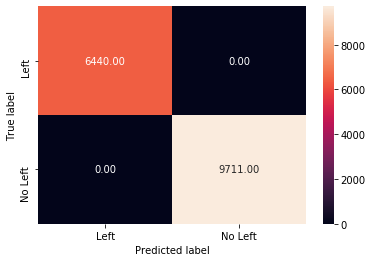

In [53]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Support Vector Machine (SVM)

In [54]:
from sklearn.svm import LinearSVC

In [55]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [56]:
y_pred=svm_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [57]:
svm = accuracy_score( y_test, y_pred)
svm

0.7959011666592734

### MLP

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [59]:
# Now apply the transformations to the data:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [60]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [61]:
y_pred=mlp.predict(test_X)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[9609    0  102    0    0]
 [   0 6815  644    0    0]
 [   0  271 2150    0    0]
 [   0  521 2364    0    0]
 [   0    0   67    0    0]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      9711
         1.0       0.90      0.91      0.90      7459
         2.0       0.40      0.89      0.55      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.82     22543
   macro avg       0.46      0.56      0.49     22543
weighted avg       0.77      0.82      0.79     22543



In [64]:
mlp = accuracy_score(y_test, y_pred)
mlp

0.8239364769551524

# Deep Learning

In [67]:
from sklearn.model_selection import train_test_split
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train = train[top_features]
labels_train = train['attack_class']
features_test = test[top_features]
labels_test  = test['attack_class']

In [68]:
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape

((125972, 15), (125972,), (22543, 15), (22543,))

In [69]:
features_train,  features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.25, random_state=1)
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape, features_val.shape ,labels_val.shape

((94479, 15), (94479,), (22543, 15), (22543,), (31493, 15), (31493,))

In [70]:
import datetime
import os
log_dir = os.path.join("train_logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [71]:
# this function has evaluation metrics
def report(prediction, y_true):
    print('        ----------Classification Report Of Classes-------------')
    print(classification_report(y_true,prediction))
    print('\n        ----------Validation Data------------------')
    print('Accuarcy:',accuracy_score(y_true, prediction)* 100)
    print('Precision: {:,.4f} %'.format(precision_score(y_true, prediction, average='weighted') * 100))
    print('Recall-score: {:,.4f}'.format(recall_score(y_true, prediction, average='weighted') * 100))
    print('F1-score: {:,.4f}'.format(f1_score(y_true, prediction, average='weighted') * 100))

In [72]:
# plotting loss graphs w.r.t each epoch
def plotgraphs(model):
    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["accuracy"], 'o-')
    ax.plot([None] + model.history.history["val_accuracy"], 'x-')

    ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
    ax.set_title('Training/Val Accuracy Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')
    plt.show()

    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["loss"], 'o-')
    ax.plot([None] + model.history.history["val_loss"], 'x-')

    ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
    ax.set_title('Training/Val Losses Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()

In [73]:
vggnet= Sequential()

vggnet.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
vggnet.add(Dropout(0.1))
vggnet.add(Dense(20, activation='softmax'))

vggnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4096      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                5140      
Total params: 9,236
Trainable params: 9,236
Non-trainable params: 0
_________________________________________________________________


In [74]:
vggnet.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [75]:
vggnet.fit(features_train,labels_train,epochs=30,batch_size=64,validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
   1/1477 [..............................] - ETA: 0s - loss: 47.9091 - accuracy: 0.0000e+00WARNING:tensorflow:From /home/user/test/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1477/1477 [==============================] - 13s 9ms/step - loss: 0.5238 - accuracy: 0.9321 - val_loss: 0.0227 - val_accuracy: 0.9929
Epoch 2/30
1477/1477 [==============================] - 12s 8ms/step - loss: 0.0395 - accuracy: 0.9897 - val_loss: 0.0094 - val_accuracy: 0.9980
Epoch 3/30
1477/1477 [==============================] - 12s 8ms/step - loss: 0.0202 - accuracy: 0.9951 - val_loss: 0.0101 - val_accuracy: 0.9981
Epoch 4/30
1477/1477 [==============================] - 13s 8ms/step - loss: 0.0136 - accuracy: 0.9967 - val_loss: 0.0070 - val_accuracy: 0.9981
Epoch 5/30
1477/1477 [========================

In [ ]:
vggnet_acc = 

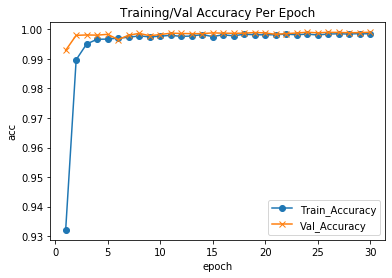

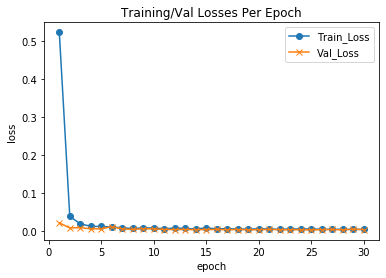

In [76]:
plotgraphs(vggnet)

In [77]:
predict = np.argmax(vggnet.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.95      0.87      0.90      7459
         2.0       0.38      0.95      0.55      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.82     22543
   macro avg       0.47      0.56      0.49     22543
weighted avg       0.78      0.82      0.79     22543


        ----------Validation Data------------------
Accuarcy: 81.93230714634254
Precision: 78.4917 %
Recall-score: 81.9323
F1-score: 78.8590


In [78]:
resnet= Sequential()

resnet.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
resnet.add(Dropout(0.1))
resnet.add(Dense(128, activation='relu'))
resnet.add(Dropout(0.1))
resnet.add(Dense(20, activation = 'softmax'))

resnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2580      
Total params: 39,572
Trainable params: 39,572
Non-trainable params: 0
_________________________________________________________________


In [79]:
resnet.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [80]:
resnet.fit(features_train,labels_train,epochs=10,batch_size=64,
         validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/10
1477/1477 [==============================] - 17s 12ms/step - loss: 0.2839 - accuracy: 0.9403 - val_loss: 2.1991 - val_accuracy: 0.7886
Epoch 2/10
1477/1477 [==============================] - 17s 12ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 2.4127 - val_accuracy: 0.8227
Epoch 3/10
1477/1477 [==============================] - 17s 12ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 2.0393 - val_accuracy: 0.7981
Epoch 4/10
1477/1477 [==============================] - 17s 12ms/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 2.3260 - val_accuracy: 0.8122
Epoch 5/10
1477/1477 [==============================] - 17s 12ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 2.1209 - val_accuracy: 0.8077
Epoch 6/10
1477/1477 [==============================] - 18s 12ms/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 1.9227 - val_accuracy: 0.8034
Epoch 7/10
1477/1477 [==============================] - 17s 12ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 2.4388 -

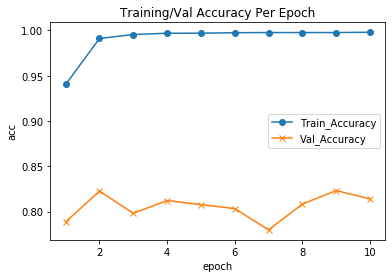

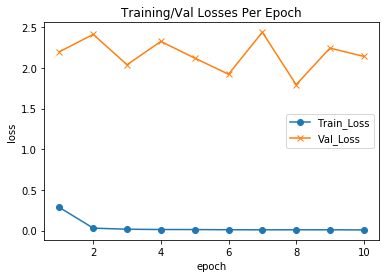

In [81]:
plotgraphs(resnet)

In [82]:
predict = np.argmax(resnet.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

In [83]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.87      0.89      0.88      7459
         2.0       0.38      0.82      0.52      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.81     22543
   macro avg       0.45      0.54      0.48     22543
weighted avg       0.76      0.81      0.78     22543


        ----------Validation Data------------------
Accuarcy: 81.39111919442843
Precision: 76.0646 %
Recall-score: 81.3911
F1-score: 77.8666


In [84]:
alexnet= Sequential()

alexnet.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
alexnet.add(Dropout(0.1))
alexnet.add(Dense(128, activation='relu'))
alexnet.add(Dropout(0.1))
alexnet.add(Dense(64, activation='relu'))
alexnet.add(Dropout(0.1))
alexnet.add(Dense(20, activation = 'softmax'))

alexnet.summary()
alexnet.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
alexnet.fit(features_train,labels_train,epochs=10,batch_size=128,
         validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               4096      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)               

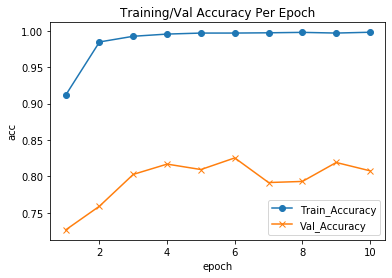

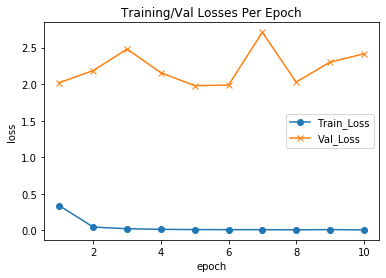

In [85]:
plotgraphs(alexnet)

In [86]:
predict = np.argmax(alexnet.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.87      0.88      0.88      7459
         2.0       0.36      0.80      0.50      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.81     22543
   macro avg       0.45      0.54      0.48     22543
weighted avg       0.76      0.81      0.77     22543


        ----------Validation Data------------------
Accuarcy: 80.7656478729539
Precision: 75.8435 %
Recall-score: 80.7656
F1-score: 77.4344


In [87]:
# reshape input to be [samples, time steps, features]
y_train= to_categorical(labels_train)
y_test= to_categorical(labels_test)
y_val= to_categorical(labels_val)

X_train = np.array(features_train).reshape(features_train.shape[0], features_train.shape[1], 1)
X_test = np.array(features_test).reshape(features_test.shape[0], features_test.shape[1], 1)
X_val = np.array(features_val).reshape(features_val.shape[0], features_val.shape[1], 1)
X_train.shape , X_test.shape , X_val.shape

((94479, 15, 1), (22543, 15, 1), (31493, 15, 1))

In [88]:
y_train = np.asarray(labels_train).astype('float32').reshape((-1,1))
y_test = np.asarray(labels_test).astype('float32').reshape((-1,1))
y_val = np.asarray(labels_val).astype('float32').reshape((-1,1))

In [93]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
resnet8 = Sequential()
resnet8.add(Conv1D(64, 3, input_shape=(15, 1)))
resnet8.add(LeakyReLU(alpha=0.1))
resnet8.add(MaxPooling1D(pool_size=2))
resnet8.add(Dropout(0.3))

resnet8.add(Conv1D(64, 1))
resnet8.add(LeakyReLU(alpha=0.1))
resnet8.add(MaxPooling1D(pool_size=2))
resnet8.add(Dropout(0.3))

resnet8.add(Conv1D(64, 1))
resnet8.add(LeakyReLU(alpha=0.1))
resnet8.add(MaxPooling1D(pool_size=2))
resnet8.add(Dropout(0.3))

resnet8.add(Flatten())
resnet8.add(Dense(64, input_dim=19, kernel_initializer=hidden_initializer))
resnet8.add(LeakyReLU(alpha=0.1))
resnet8.add(Dense(32))
resnet8.add(LeakyReLU(alpha=0.1))
resnet8.add(Dense(20, activation='softmax'))

resnet8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 13, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 64)             0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 6, 64)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 64)             0

In [94]:
resnet8.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [95]:
resnet8.fit(X_train, y_train, epochs=5, batch_size=512, 
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/5
185/185 [==============================] - 17s 91ms/step - loss: 1.0775 - accuracy: 0.4953 - val_loss: 0.9516 - val_accuracy: 0.5078
Epoch 2/5
185/185 [==============================] - 16s 88ms/step - loss: 0.8945 - accuracy: 0.5257 - val_loss: 0.8371 - val_accuracy: 0.5091
Epoch 3/5
185/185 [==============================] - 17s 90ms/step - loss: 0.7448 - accuracy: 0.6684 - val_loss: 0.5235 - val_accuracy: 0.8178
Epoch 4/5
185/185 [==============================] - 16s 88ms/step - loss: 0.4312 - accuracy: 0.8501 - val_loss: 0.2014 - val_accuracy: 0.9289
Epoch 5/5
185/185 [==============================] - 17s 90ms/step - loss: 0.2051 - accuracy: 0.9279 - val_loss: 0.1149 - val_accuracy: 0.9562


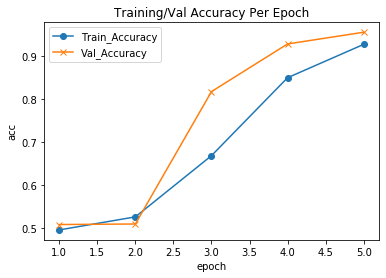

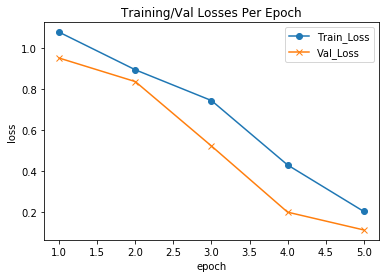

In [96]:
plotgraphs(resnet8)

In [101]:
resnet8.save('resnet.h5')

In [97]:
predict = np.argmax(resnet8.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      9711
         1.0       0.64      0.99      0.78      7459
         2.0       0.55      0.33      0.41      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.77     22543
   macro avg       0.43      0.45      0.43     22543
weighted avg       0.69      0.77      0.71     22543


        ----------Validation Data------------------
Accuarcy: 77.20356651732246
Precision: 68.7515 %
Recall-score: 77.2036
F1-score: 71.3986


In [99]:
#hyperparameters

# Initialising the RNN
rnn3 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (15,1)))
rnn3.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding a third RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding the output layer
rnn3.add(Flatten())
rnn3.add(Dense(64, input_dim=20, kernel_initializer=hidden_initializer))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(32))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(units = 20, activation='softmax'))

rnn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 15, 32)            1088      
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 32)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 15, 32)            2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 32)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 15, 32)            2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [100]:
rnn3.compile(loss = "sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn3.fit(X_train, y_train, epochs=5, batch_size=512, 
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/5
185/185 [==============================] - 29s 155ms/step - loss: 0.4107 - accuracy: 0.8863 - val_loss: 0.0391 - val_accuracy: 0.9857
Epoch 2/5
185/185 [==============================] - 26s 141ms/step - loss: 0.0335 - accuracy: 0.9883 - val_loss: 0.0150 - val_accuracy: 0.9956
Epoch 3/5
185/185 [==============================] - 26s 138ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0118 - val_accuracy: 0.9963
Epoch 4/5
185/185 [==============================] - 24s 132ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0132 - val_accuracy: 0.9968
Epoch 5/5
185/185 [==============================] - 39s 210ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0099 - val_accuracy: 0.9966


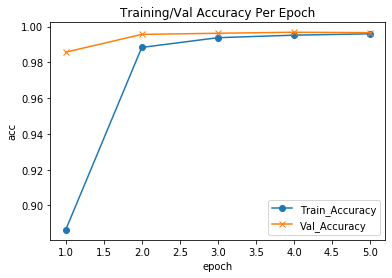

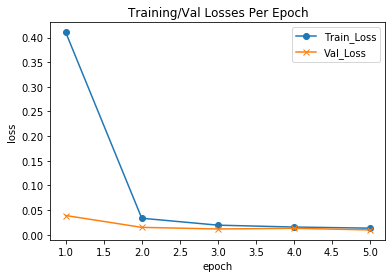

In [102]:
plotgraphs(rnn3)

In [103]:
predict = np.argmax(rnn3.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [104]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.81      0.91      0.86      7459
         2.0       0.42      0.76      0.54      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.81     22543
   macro avg       0.44      0.53      0.48     22543
weighted avg       0.74      0.81      0.77     22543


        ----------Validation Data------------------
Accuarcy: 81.39555516124739
Precision: 74.2859 %
Recall-score: 81.3956
F1-score: 77.2012


# Load Model and Predict

In [105]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,0,0,229,0.06,0.00,0.04,10,0,0,21,0,0.04,0.00,0]])

array([1.])